In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# stats model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/Housing.csv')
data.shape

(545, 13)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


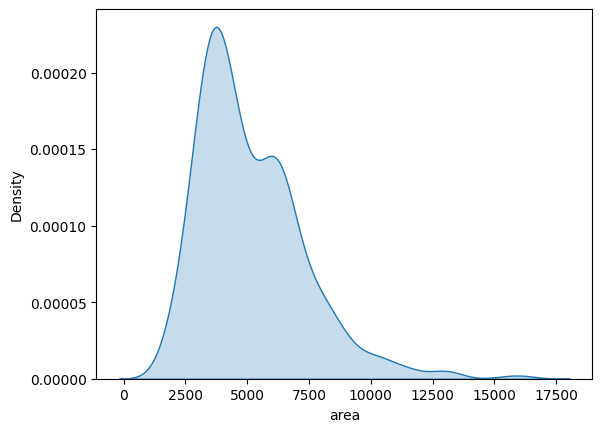

In [ ]:
# Analyse the target variable
sns.kdeplot(data['area'],fill = True)
plt.show()

# we can apply box-cox transformation to converte right skewed data to normally distributed data

In [ ]:
# understanding the categorical data
for cols in data.columns:
  if data[cols].dtypes == 'O':
    print(cols, ':', data[cols].unique())

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# encoding the categorcial variables
edata = pd.get_dummies(data,drop_first=True, dtype = 'int')
edata.columns = edata.columns.str.replace('yes','')
edata.columns = edata.columns.str.replace('furnishingstatus_','')
edata.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_,guestroom_,basement_,hotwaterheating_,airconditioning_,prefarea_,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
# train test split
train,test = train_test_split(edata,test_size = 0.2,random_state=42)
train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_,guestroom_,basement_,hotwaterheating_,airconditioning_,prefarea_,semi-furnished,unfurnished
46,7525000,6000,3,2,4,1,1,0,0,0,1,0,0,0
93,6300000,7200,3,2,1,3,1,0,1,0,1,0,1,0
335,3920000,3816,2,1,1,2,1,0,1,0,1,0,0,0
412,3430000,2610,3,1,2,0,1,0,1,0,0,1,0,1
471,3010000,3750,3,1,2,0,1,0,0,0,0,0,0,1


In [ ]:
# normalising the train data - MinMaxScaler
cols = ['price','area','bedrooms','bathrooms','stories','parking']

scaler = MinMaxScaler()  # to keep the values positive after scaling (0-1)
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])
train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_,guestroom_,basement_,hotwaterheating_,airconditioning_,prefarea_,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,0.333333,1,0,0,0,1,0,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1.000000,1,0,1,0,1,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,0.666667,1,0,1,0,1,0,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,0.000000,1,0,1,0,0,1,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,0.000000,1,0,0,0,0,0,0,1


In [ ]:
# training and testing splits

# training
x_train = train.drop(['price'],axis =1)
y_train = train['price']

#testing
x_test = test.drop(['price'],axis =1)
y_test = test['price']

Model Building

In [ ]:
# Simple linear model

    # y = mx + c
    # price = m*(area) + C   #C(y)intercept ,m(slope)

# mnultiple linear regression

    # y = MnXn + C
    # price = M1*(area) + M2*(bedrooms) + M3*(bathrooms) + . . . + C

In [ ]:
# Simple linear model for area

# add constant
lr_data = sm.add_constant(x_train['area'])

# fit the data onto the ols model
lr_model = sm.OLS(y_train,lr_data).fit()  # here we use 1st y_train then again x_train, due to OLS

In [ ]:
lr_data.head()

,const,area
46,1.0,0.298969
93,1.0,0.381443
335,1.0,0.148866
412,1.0,0.065979
471,1.0,0.144330


In [ ]:
#model params
print(lr_model.params)

# y = mx+c , price = 0.589940*(area)  + 0.139496

const    0.139496
area     0.589940
dtype: float64


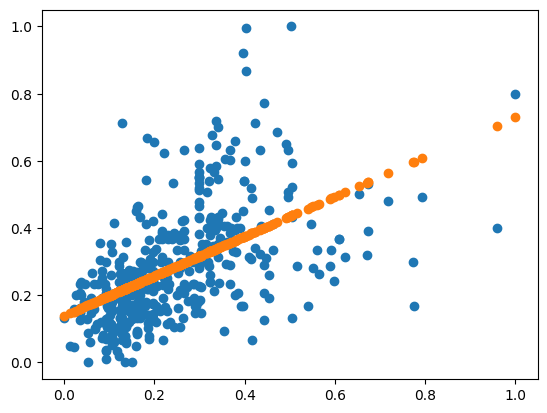

In [ ]:
# scatter plot
plt.scatter(x_train['area'],y_train)
plt.scatter(x_train['area'], 0.589940*(x_train['area'])  + 0.139496)
plt.show()

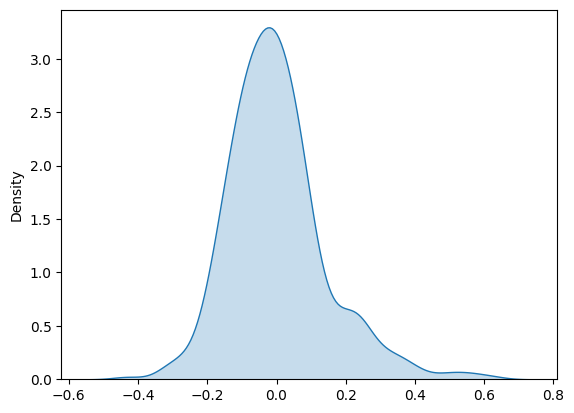

In [ ]:
# residual analysis
y_train_predict = lr_model.predict(lr_data)
res = y_train - y_train_predict

# kde plot for the residuals
sns.kdeplot(res,fill = True)
plt.show()

In [ ]:
# R-Square value = (1-(RSS/TSS))   Reesidual wit least sum of squares

RSS = (( y_train - y_train_predict)**2).sum()
TSS = ((y_train - y_train.mean())**2).sum()
r_sqaure = 1- RSS/TSS

print(round(r_sqaure*100,2))

28.5


In [ ]:
# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.75e-33
Time:                        07:27:27   Log-Likelihood:                 234.19
No. Observations:                 436   AIC:                            -464.4
Df Residuals:                     434   BIC:                            -456.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.013     10.933      0.0

# Multiple linear Regression

In [ ]:
# add constant
mlr_data = sm.add_constant(x_train)

# fit the data onto the model
mlr_model = sm.OLS(y_train,mlr_data).fit()

In [ ]:
# Model summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.16e-97
Time:                        07:27:27   Log-Likelihood:                 413.55
No. Observations:                 436   AIC:                            -799.1
Df Residuals:                     422   BIC:                            -742.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0455      0.021  

In [ ]:
# the model is statistically significant but few cols are not
    # reason is that it may have multicollinearity (high correlation between independent features)
    # using VIF (variance inflation factor) we can fix the insignificance
    # VIF Method - VIF > 5 is bad (highly correlated)

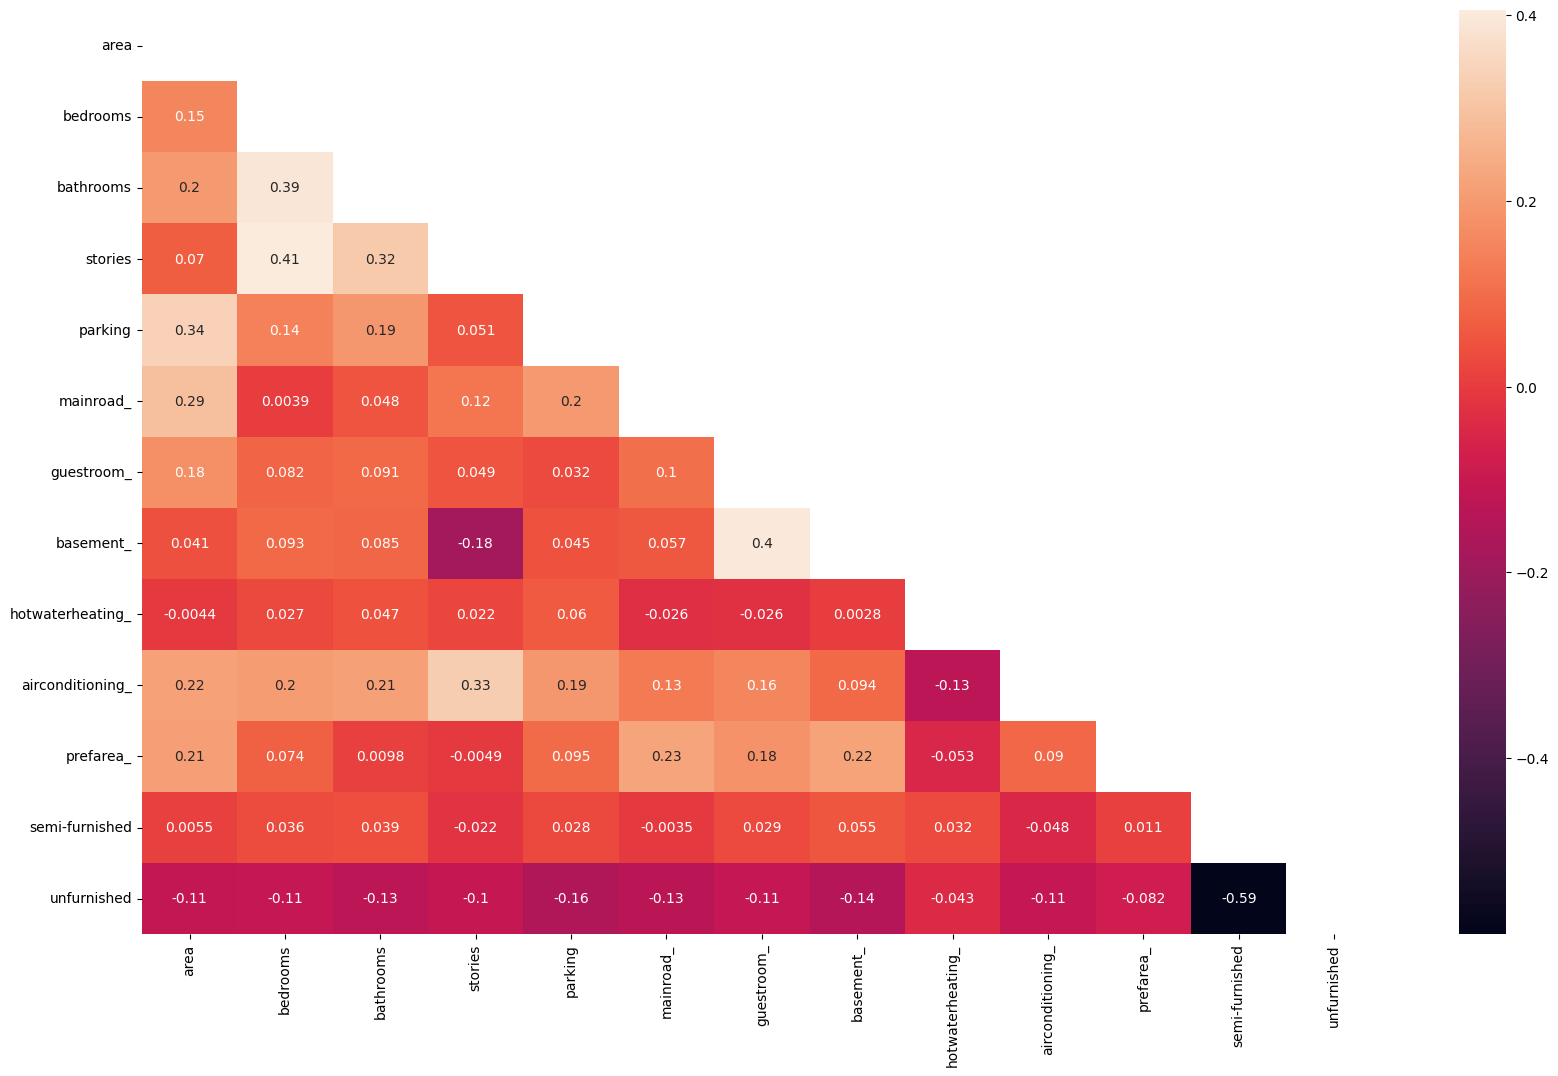

In [ ]:
# heatmap for correlation
plt.figure(figsize=(20,12))
sns.heatmap(x_train.corr(),annot =True,mask = np.triu(x_train.corr()))
plt.show()

In [ ]:
# Droping the 'semi-furnished' since its stats insignificant (p>0.05)
x_tr = x_train.drop(['semi-furnished'],axis =1)


In [ ]:
# Fitting all the data at once
x_train_lm = sm.add_constant(x_tr)
mlr_2 = sm.OLS(y_train,x_train_lm).fit()

print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     76.70
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           4.11e-98
Time:                        07:27:28   Log-Likelihood:                 412.99
No. Observations:                 436   AIC:                            -800.0
Df Residuals:                     423   BIC:                            -747.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0362      0.019  

In [ ]:
# Droping the 'guestroom' since its stats insignificant (p>0.05)
x_tr = x_tr.drop(['guestroom_'], axis=1)

KeyError: "['guestroom_'] not found in axis"

In [ ]:
# Fitting all the data at once
x_train_lm = sm.add_constant(x_tr)
mlr_3 = sm.OLS(y_train,x_train_lm).fit()

print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     83.09
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.68e-98
Time:                        07:27:28   Log-Likelihood:                 411.60
No. Observations:                 436   AIC:                            -799.2
Df Residuals:                     424   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0352      0.019  

In [ ]:
# Droping the 'bedrooms' since its stats insignificant (p>0.05)
x_tr = x_tr.drop(['bedrooms'], axis=1)

In [ ]:
x_train_lm = sm.add_constant(x_tr)
mlr_4 = sm.OLS(y_train,x_train_lm).fit()

print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     91.34
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.66e-99
Time:                        07:30:44   Log-Likelihood:                 411.14
No. Observations:                 436   AIC:                            -800.3
Df Residuals:                     425   BIC:                            -755.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0460      0.015  

In [ ]:
# dataframe with column name and respective vif
vif_df = pd.DataFrame()
vif_df['Features'] = x_tr.columns
vif_df['VIF'] = [round(vif(x_tr.values,i),2) for i in range(x_tr.shape[1])]
vif_df = vif_df.sort_values(by="VIF", ascending=False)
vif_df

,Features,VIF
4,mainroad_,4.91
0,area,4.17
2,stories,2.29
3,parking,1.97
7,airconditioning_,1.81
5,basement_,1.67
1,bathrooms,1.59
8,prefarea_,1.48
9,unfurnished,1.32
6,hotwaterheating_,1.08


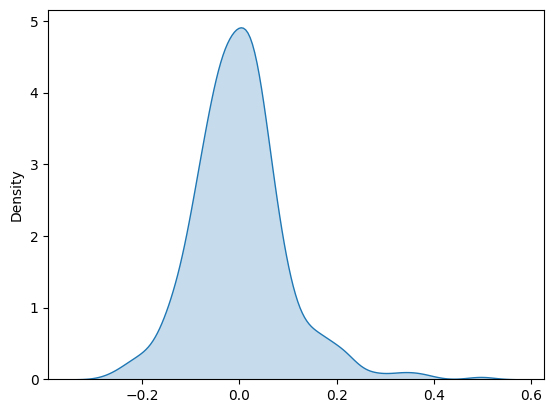

In [ ]:
# residual analysis
y_train_predict = mlr_4.predict(x_train_lm)
res = y_train - y_train_predict

# kde plot for the residuals
sns.kdeplot(res,fill = True)
plt.show()

In [ ]:
# test prediction

# add constant
x_test_m4_data = sm.add_constant(x_test)

# droping the data in testing which are not in training
x_test_m4_data.drop(['semi-furnished', 'guestroom_', 'bedrooms'], axis=1, inplace=True)

# prediction on the data
y_pred = mlr_4.predict(x_test_m4_data)

In [ ]:
# Model metrics
print('Testing_Accuracy:',round(r2_score(y_test,y_pred)*100,2),'%' )

Testing_Accuracy: 64.8 %
